# Movie Success Predictor
## Notebook 03: Exploratory Data Analysis (EDA)

### Objective
In this notebook, we:
- Explore distributions of key variables
- Identify patterns and relationships
- Generate insights that guide feature engineering
- Avoid any modeling or feature creation

## Problem Context

This project focuses on predicting movie success using two distinct modeling tasks:

1. **Hit / Flop Classification**
   - Defined using Return on Investment (ROI)
   - A movie is labeled as a *Hit* if ROI > 100%, otherwise as a *Flop*

2. **IMDb Rating Prediction**
   - Predicting audience ratings (`vote_average`) on a 0–10 scale

The purpose of this exploratory analysis is to understand how various
numerical and categorical features relate to these targets, without
performing any feature engineering or modeling.

## Dataset Overview and Assumptions

The dataset used in this notebook is the cleaned and processed output
from Phase 2 (Data Cleaning & Preparation).

Assumptions for this phase:
- Movies with zero budget, zero revenue, or zero runtime have been removed
- Missing values have already been handled
- Duplicate records have been eliminated
- No target variables have been created yet
- No data leakage has been introduced

All analysis performed in this notebook is strictly exploratory.


## Step 1: Load the Processed Dataset

We load the cleaned and validated dataset created in Phase 2.
All exploratory analysis will be based on this dataset.


In [2]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Matplotlib style
plt.style.use('seaborn-v0_8-darkgrid')

# Seaborn settings
sns.set_palette("husl")
sns.set_context("notebook")

# Figure resolution
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

# Font sizes (readability)
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

print("EDA environment setup completed successfully.")

df = pd.read_csv("../data/processed/processed_movies.csv")
print(f"Loaded dataset with shape: rows={df.shape[0]}, columns={df.shape[1]}")

EDA environment setup completed successfully.
Loaded dataset with shape: rows=3228, columns=15


In [3]:
import ast
df['genres_list'] = df['genres_list'].apply(ast.literal_eval)

## Step 2: Budget Distribution

We analyze the distribution of movie budgets to understand:
- Typical budget ranges
- Presence of skewness and outliers
- Implications for modeling


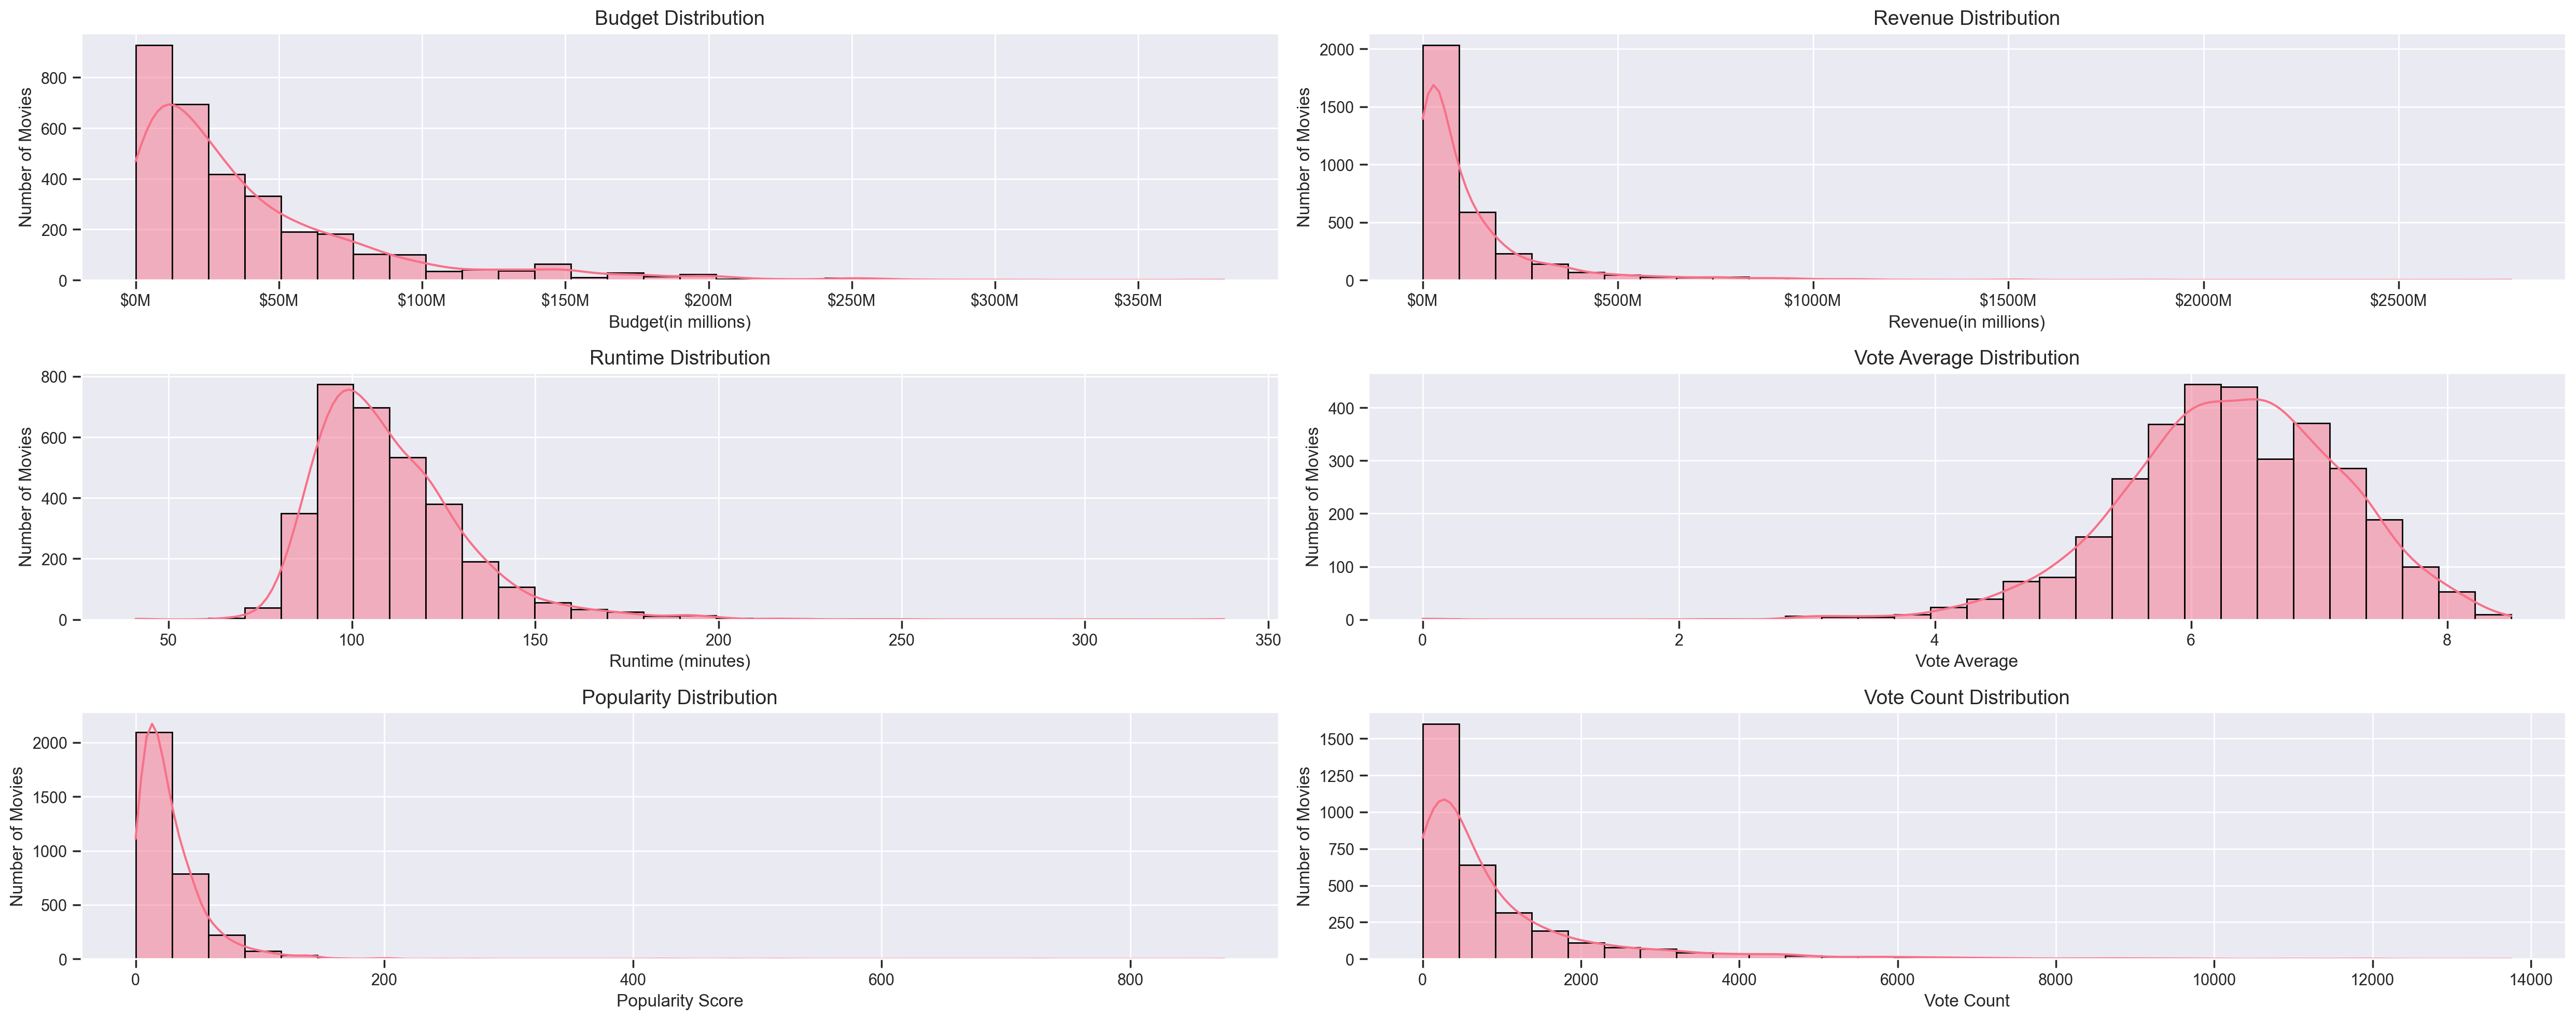

<Figure size 1280x960 with 0 Axes>

In [4]:
figure, ax = plt.subplots(3,2,figsize=(25,10))
sns.histplot(data=df, x='budget', bins=30, kde=True, ax=ax[0,0])
ax[0,0].set_title('Budget Distribution')
ax[0,0].set_xlabel('Budget(in millions)')
ax[0,0].set_ylabel('Number of Movies')
ax[0,0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x/1e6:.0f}M'))

# Revenue Distribution
sns.histplot(data=df, x='revenue', bins=30, kde=True, ax=ax[0,1])
ax[0,1].set_title('Revenue Distribution')
ax[0,1].set_xlabel('Revenue(in millions)')
ax[0,1].set_ylabel('Number of Movies')
ax[0,1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x/1e6:.0f}M'))

# Runtime Distribution
sns.histplot(data=df, x='runtime', bins=30, kde=True, ax=ax[1,0])
ax[1,0].set_title('Runtime Distribution')
ax[1,0].set_xlabel('Runtime (minutes)')
ax[1,0].set_ylabel('Number of Movies')
sns.histplot(data=df, x='vote_average', bins=30, kde=True, ax=ax[1,1])

# Vote Average Distribution
ax[1,1].set_title('Vote Average Distribution')
ax[1,1].set_xlabel('Vote Average')
ax[1,1].set_ylabel('Number of Movies')

# Popularity Distribution
sns.histplot(data=df, x='popularity', bins=30, kde=True, ax=ax[2,0])
ax[2,0].set_title('Popularity Distribution')
ax[2,0].set_xlabel('Popularity Score')
ax[2,0].set_ylabel('Number of Movies')

# Vote Count Distribution
sns.histplot(data=df, x='vote_count', bins=30, kde=True, ax=ax[2,1])
ax[2,1].set_title('Vote Count Distribution')
ax[2,1].set_xlabel('Vote Count')
ax[2,1].set_ylabel('Number of Movies')

plt.tight_layout()
plt.show()

plt.savefig(fname="Distribution_Plots.png", dpi=300)

## Step 2 Summary & Modeling Implications

Key observations from target and core variable distributions:

- Budget, revenue, popularity, and vote count are heavily right-skewed.
- Runtime follows a near-normal distribution.
- IMDb ratings have low variance and are concentrated between 5 and 7.

### Implications for Modeling:
- Log transformations will be required for budget, revenue, popularity, and vote count.
- Runtime can likely be used without transformation.
- Rating prediction will be challenging due to limited variance.
- Audience engagement metrics should be weighted rather than used independently.

These insights will guide feature engineering decisions in Phase 4.


## Step 3: Relationship Analysis

In this step, we analyze relationships between key numerical variables
to understand drivers of movie success and audience perception.


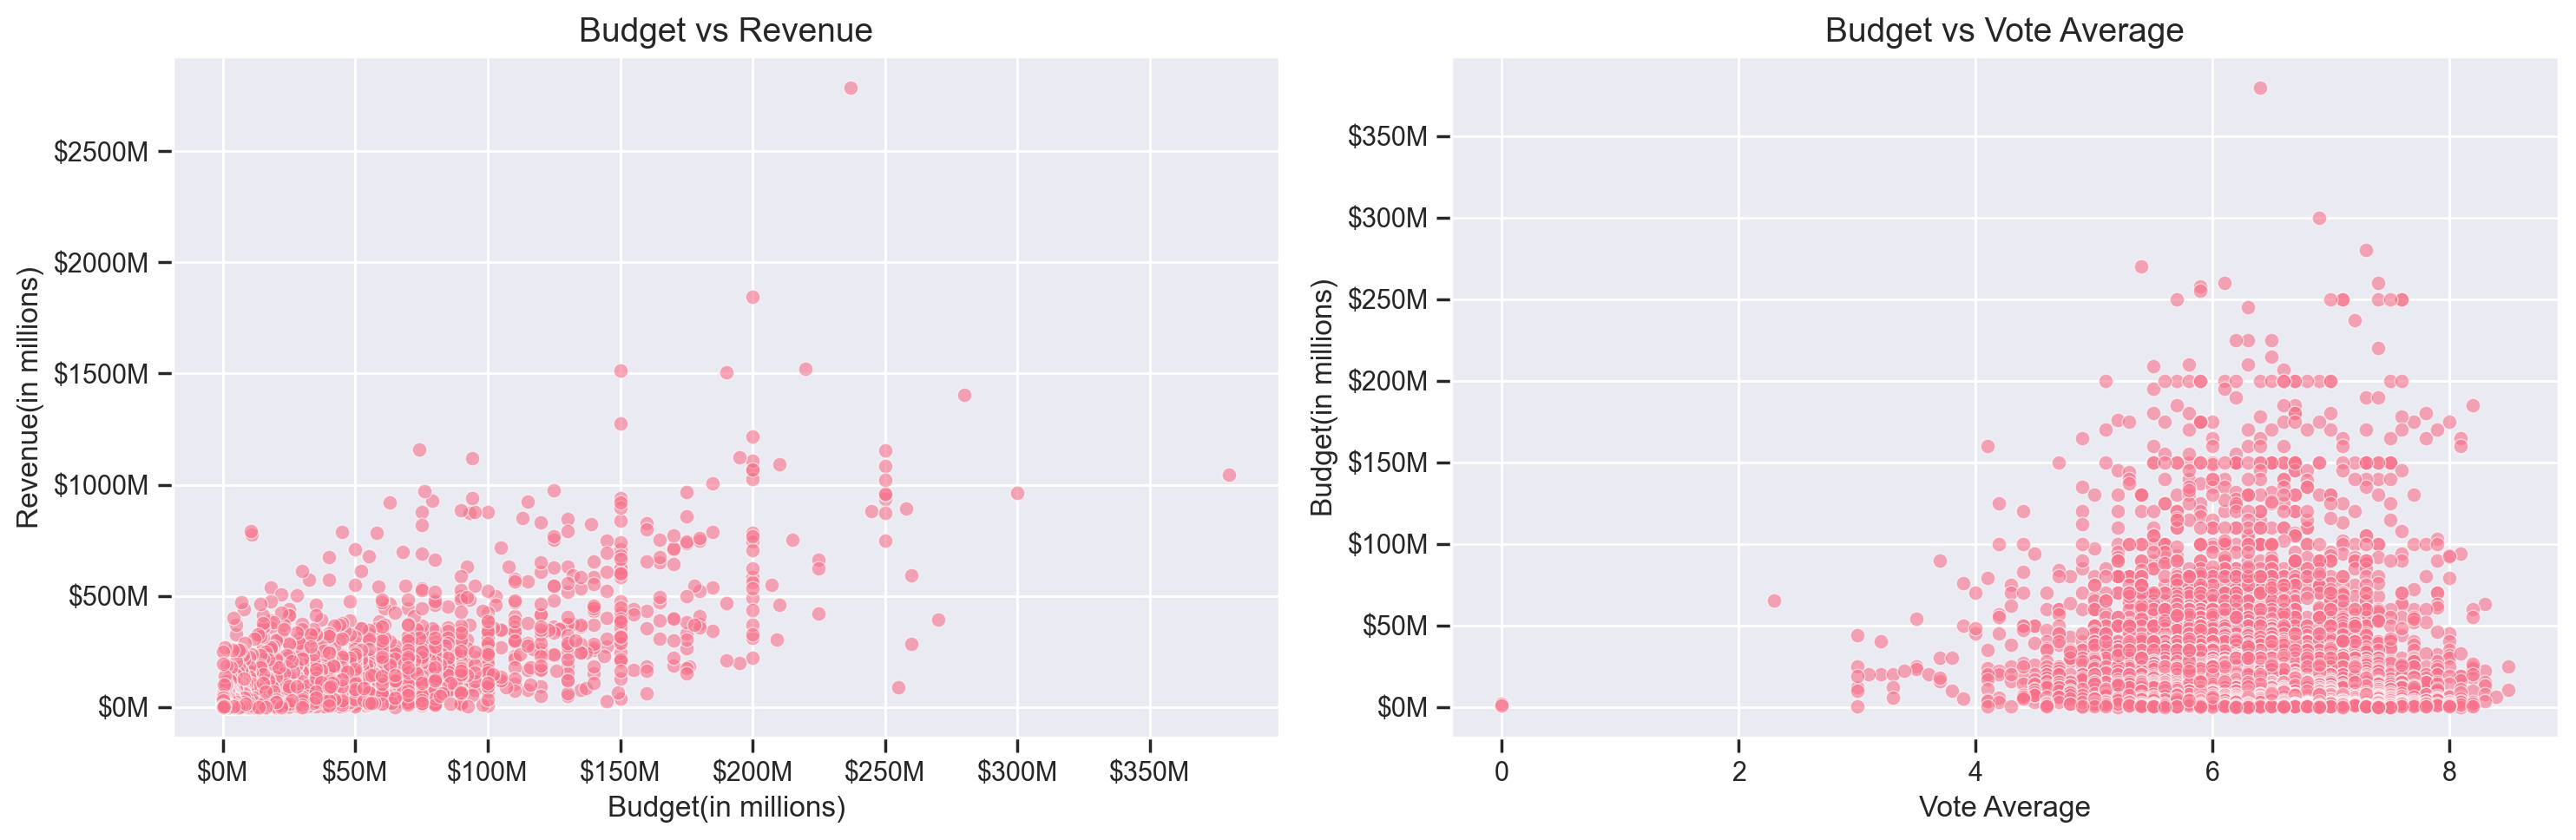

In [5]:
figure,ax=plt.subplots(1,2,figsize=(15,5))
sns.scatterplot(data=df, x='budget', y='revenue', ax=ax[0],alpha=0.6)
ax[0].set_title('Budget vs Revenue')
ax[0].set_xlabel('Budget(in millions)')
ax[0].set_ylabel('Revenue(in millions)')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x/1e6:.0f}M'))
ax[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x/1e6:.0f}M'))
sns.scatterplot(data=df,x="vote_average",y="budget",ax=ax[1],alpha=0.6)
ax[1].set_title('Budget vs Vote Average')
ax[1].set_xlabel('Vote Average')
ax[1].set_ylabel('Budget(in millions)')
ax[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'${y/1e6:.0f}M'))
plt.tight_layout()
plt.show()

### Budget vs Revenue

**Insight:**
- Budget and revenue show a positive but highly dispersed relationship.
- Higher budgets increase the *potential* for high revenue, but do not guarantee success.
- Several high-budget movies earn only moderate revenue, while a few blockbusters dominate total earnings.
- The presence of extreme outliers indicates that revenue distribution is heavily skewed.

**Implication:**
- Budget alone is insufficient to predict movie success.
- Revenue-based modeling must account for extreme outliers.
- ROI-based metrics will be more informative than raw revenue.
- Log transformations will be necessary to reduce skewness.

### Budget vs IMDb Rating

**Insight:**
- IMDb ratings show little to no correlation with movie budget.
- High-budget films do not consistently achieve higher ratings than low-budget films.
- Ratings are concentrated in a narrow range across all budget levels.

**Implication:**
- Budget is not a strong predictor of movie quality.
- Rating prediction models should rely on non-financial features.
- Separating success prediction (revenue-based) from rating prediction is justified.

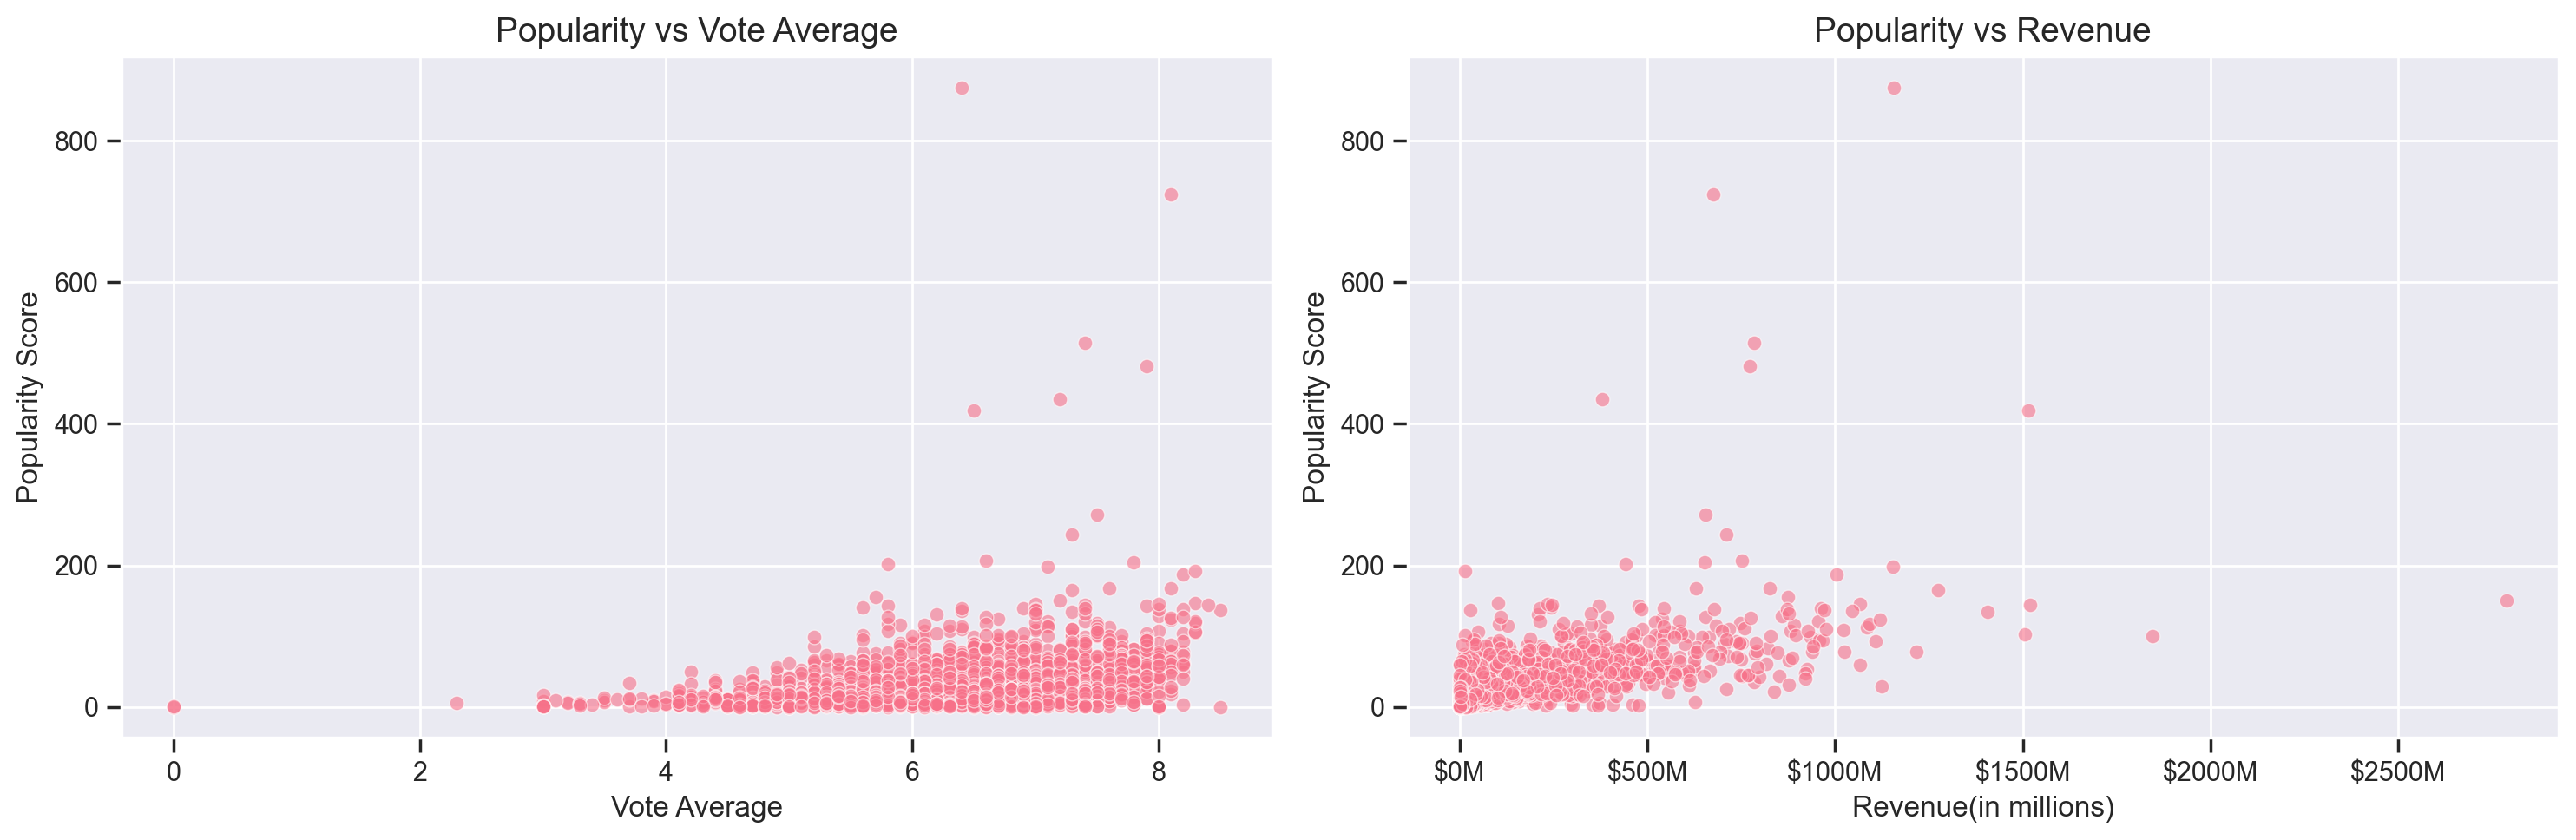

In [6]:
figture,ax=plt.subplots(1,2,figsize=(15,5))
sns.scatterplot(data=df,y="popularity",x="vote_average",ax=ax[0],alpha=0.6)
ax[0].set_title('Popularity vs Vote Average')
ax[0].set_ylabel('Popularity Score')
ax[0].set_xlabel('Vote Average')
sns.scatterplot(data=df,y="popularity",x="revenue",ax=ax[1],alpha=0.6)
ax[1].set_title('Popularity vs Revenue')
ax[1].set_ylabel('Popularity Score')
ax[1].set_xlabel('Revenue(in millions)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'${y/1e6:.0f}M'))
plt.tight_layout()
plt.show()

### Popularity vs IMDb Rating

**Insight:**
- Popularity shows a weak relationship with IMDb ratings.
- Highly popular movies are not consistently better rated than less popular ones.
- Some well-rated movies have low popularity, indicating limited audience reach.

**Implication:**
- Popularity captures audience engagement rather than movie quality.
- Popularity should not be treated as a proxy for ratings.
- Rating prediction models must rely on features beyond popularity.

### Popularity vs Revenue

**Insight:**
- Popularity shows a strong positive relationship with revenue.
- Movies with higher popularity tend to generate significantly higher revenue.
- Extreme revenue outliers correspond to highly popular blockbuster films.

**Implication:**
- Popularity is a strong indicator of commercial success.
- This feature is highly valuable for hit/flop classification.
- Revenue modeling must handle outliers and skewed distributions carefully.


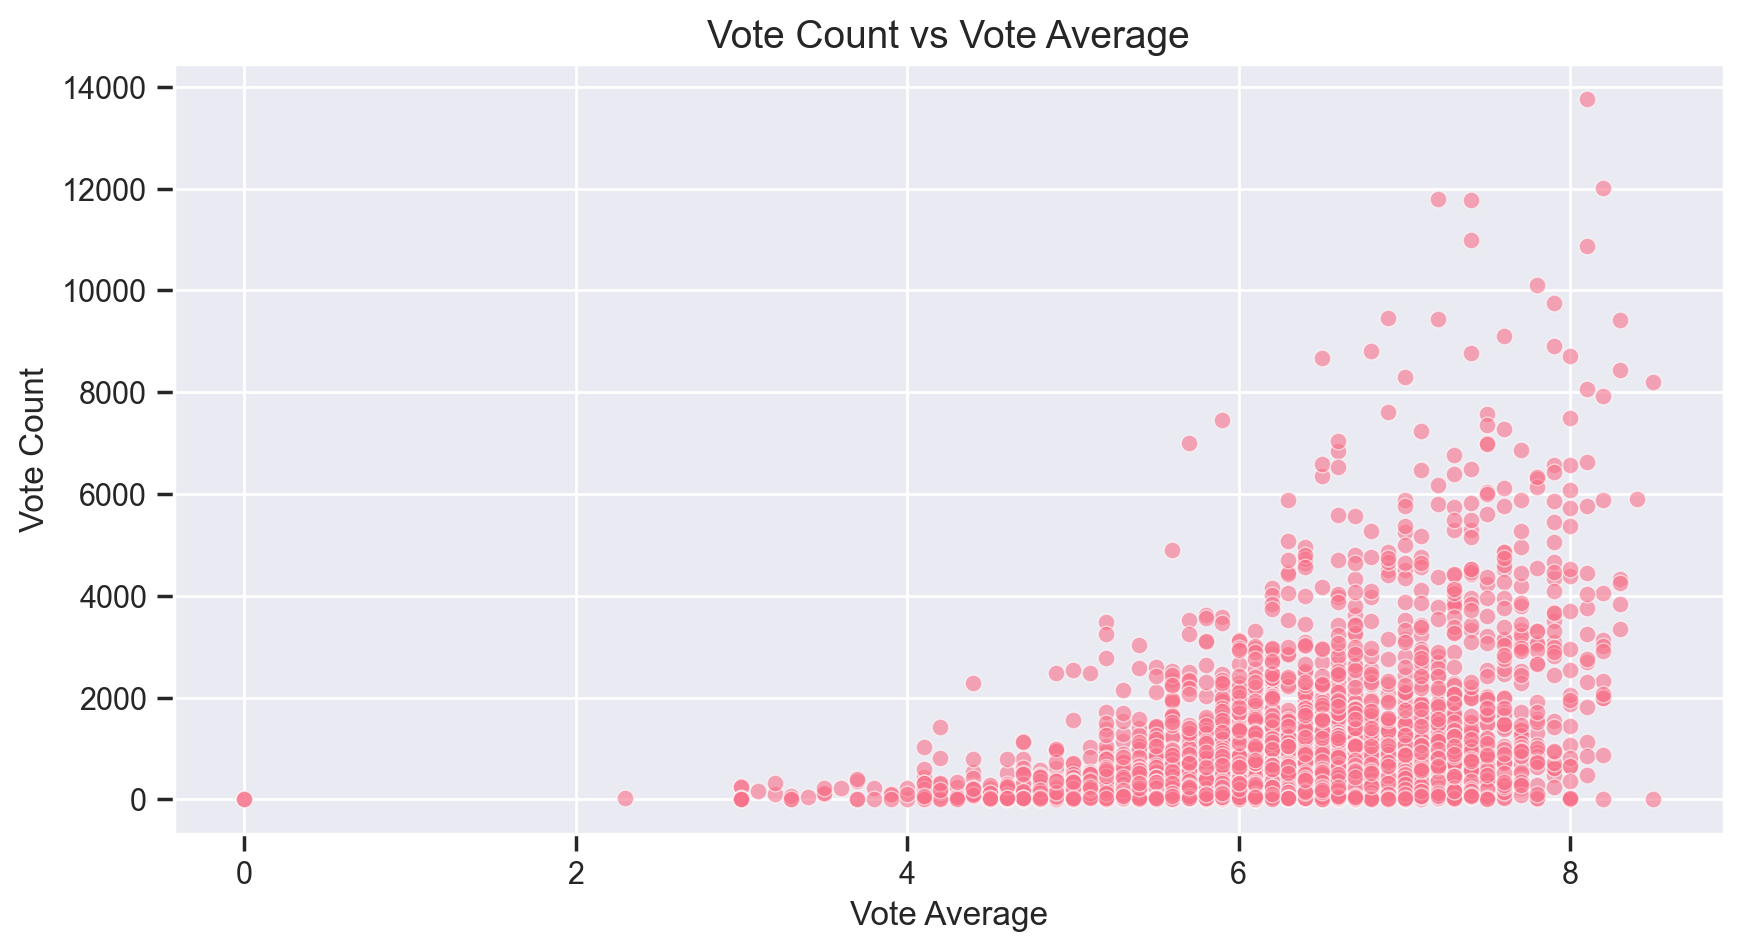

In [7]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df,y="vote_count",x="vote_average",alpha=0.6)
plt.title('Vote Count vs Vote Average')
plt.xlabel('Vote Average')
plt.ylabel('Vote Count')
plt.show()

### Vote Count vs IMDb Rating

**Insight:**
- Movies with low vote counts show high variability in IMDb ratings.
- As vote count increases, ratings become more stable and concentrated.
- High ratings with very few votes are less reliable indicators of quality.

**Implication:**
- Vote count plays a crucial role in rating reliability.
- Raw vote average should not be used independently.
- Rating prediction should incorporate vote count weighting.


## Step 3 Summary & Modeling Implications

- Budget increases revenue potential but does not guarantee success.
- Popularity is strongly linked to revenue but weakly related to ratings.
- IMDb ratings show limited variance and weak dependence on financial features.
- Vote count stabilizes rating reliability and should be incorporated into modeling.

These insights guide the separation of success prediction and rating prediction
and inform feature engineering decisions in Phase 4.


### 4.1 Genre vs Revenue And Genre vs IMDb Rating

We analyze how different movie genres perform in terms of revenue
to identify genres associated with higher commercial success.

We examine how IMDb ratings vary across different genres
to understand genre-based audience preferences.

In [8]:
df["primary_genre"]=df["genres_list"].apply(lambda x:x[0] if len(x)>0 else "Unknown")

In [9]:
genre_counts=df["primary_genre"].value_counts()
top_genres=genre_counts[genre_counts>20].index
df_top_genres=df[df["primary_genre"].isin(top_genres)]
df_top_genres.head(1)

,budget,id,original_language,popularity,revenue,runtime,title,vote_average,vote_count,release_year,release_month,release_day,release_season,genres_list,director,primary_genre
0,237000000,19995,en,150.44,2787965087,162.00,Avatar,7.20,11800,2009,12,10,Winter,"[Action, Adventure, Fantasy, Science Fiction]",James Cameron,Action


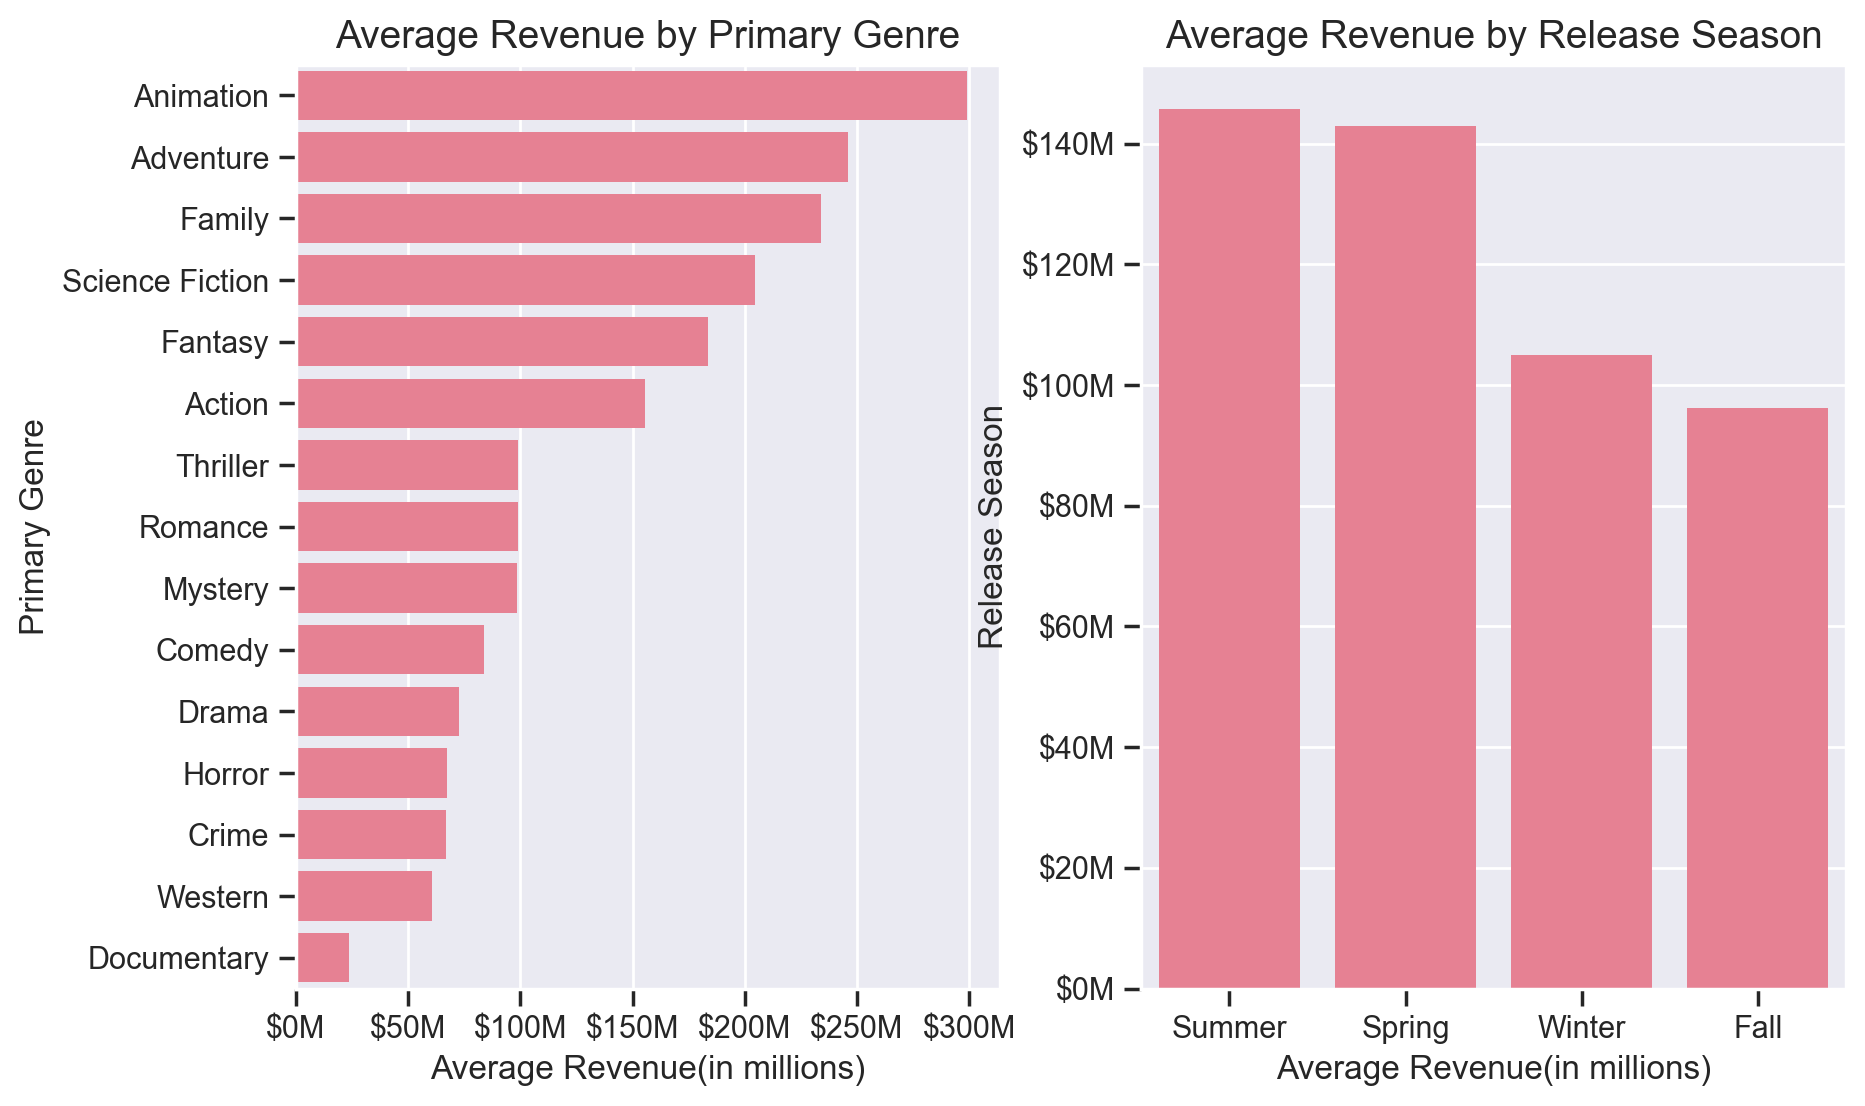

In [10]:
genres_revenue=df_top_genres.groupby('primary_genre')['revenue'].mean().sort_values(ascending=False)
figure,ax=plt.subplots(1,2,figsize=(10,6))
sns.barplot(x=genres_revenue.values,y=genres_revenue.index,ax=ax[0])
ax[0].set_title('Average Revenue by Primary Genre')
ax[0].set_xlabel('Average Revenue(in millions)')
ax[0].set_ylabel('Primary Genre')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x/1e6:.0f}M'))

season_revenue=df.groupby("release_season")["revenue"].mean().reindex(["Winter", "Spring", "Summer", "Fall"]).sort_values(ascending=False)
sns.barplot(y=season_revenue.values,x=season_revenue.index,ax=ax[1])
ax[1].set_title('Average Revenue by Release Season')
ax[1].set_xlabel('Average Revenue(in millions)')
ax[1].set_ylabel('Release Season')
ax[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x/1e6:.0f}M'))
plt.show()

**Insight:**

Commercial performance is strongly influenced by both genre and release timing.

Animation, Adventure, Family, and Science Fiction genres generate the highest average revenue, indicating strong audience demand for spectacle-driven and family-oriented content.

Genres such as Drama, Comedy, Crime, and Documentary show lower average revenue despite being frequently produced.

Movies released in Summer and Spring achieve higher average revenue, while Fall and Winter releases generally perform less strongly.

**Implication:**

Genre selection and release season are critical strategic decisions for commercial success.

High-revenue genres combined with favorable release seasons increase the likelihood of a movie being a box-office hit.

These categorical factors will be incorporated as key features in the hit/flop prediction model.

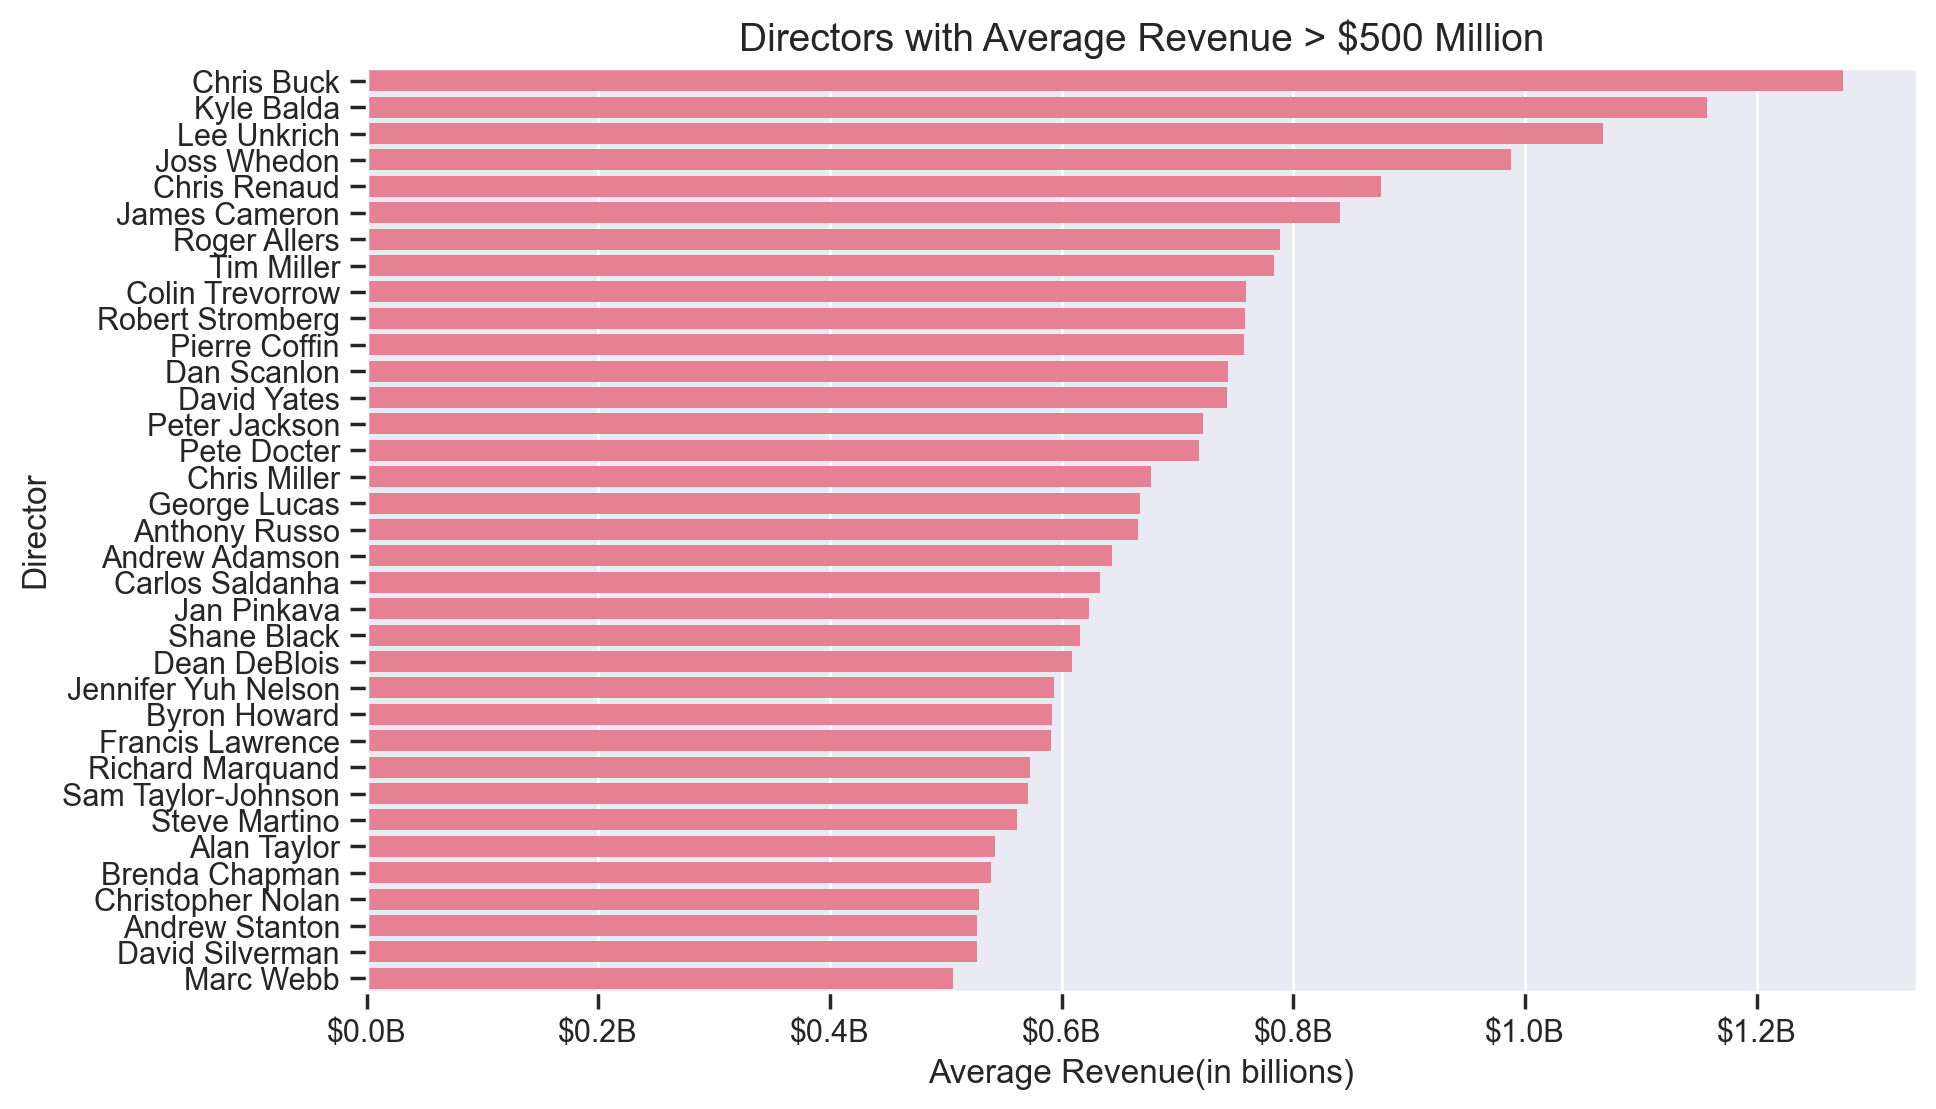

In [11]:
# find directors with average revenue > $500 million
top_directors=df.groupby("director")["revenue"].mean().sort_values(ascending=False)
df_top_directors=top_directors[top_directors>5e8]
plt.figure(figsize=(10,6))
sns.barplot(x=df_top_directors.values,y=df_top_directors.index)
plt.title('Directors with Average Revenue > $500 Million')
plt.xlabel('Average Revenue(in billions)')
plt.ylabel('Director')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x/1e9:.1f}B'))
plt.show()

### Director Influence on Box Office Revenue

The analysis reveals that a small group of directors consistently achieve exceptionally high average box-office revenue. Directors such as Chris Buck, Kyle Balda, Lee Unkrich, James Cameron, Peter Jackson, and George Lucas stand out, indicating that director reputation and prior commercial success significantly influence revenue performance.

These directors are commonly associated with established franchises, large-scale productions, and strong studio support, which collectively reduce financial risk and attract larger audiences. As a result, movies directed by these individuals tend to perform reliably well at the box office.

However, the distribution is highly skewed, with only a limited number of directors contributing to extremely high average revenue. This suggests that while director information captures experience and brand value, it may not generalize well across all movies.

From a modeling perspective, director-based features should be handled carefully. Aggregated metrics such as a director’s historical average revenue or success rate are more suitable than raw categorical encoding to avoid overfitting and ensure deployment robustness.


## Phase 3 Completion Summary

Exploratory data analysis identified key numerical and categorical factors
influencing movie success. Revenue distributions show strong skewness and
outliers, while relationship analysis highlights the importance of budget,
popularity, and audience engagement.

Categorical analysis reveals that genre, release season, and director
experience significantly impact box-office performance. These insights
provide a clear foundation for feature engineering and predictive modeling.

Further categorical breakdowns were intentionally limited to maintain
clarity, reliability, and deployment readiness.
